# Loan Approval Prediction 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


In [96]:
df = pd.read_csv('Dataset.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [97]:
df.shape



(614, 13)

In [98]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [100]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

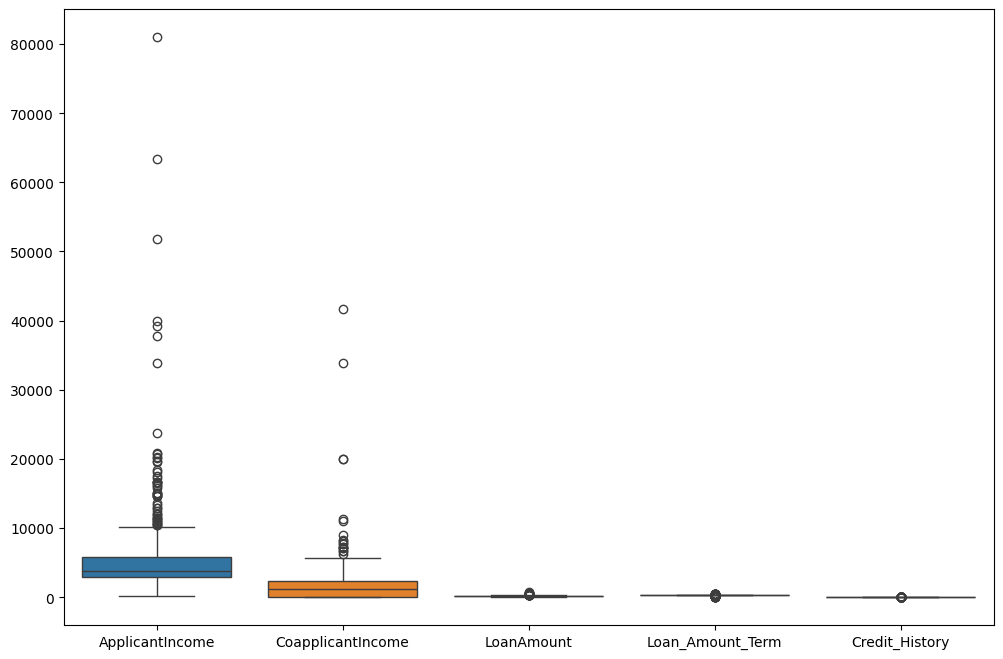

In [101]:
#checking for outliers
plt.figure(figsize=(12,8))
sns.boxplot(data=df)

In [102]:
# For Numerical Features, we will use median to fill missing values, since its less sensitive to outliers than mean
Numerical_Features = ['LoanAmount', 'Loan_Amount_Term','Credit_History']
for feature in Numerical_Features:
    df[feature] = df[feature].fillna(df[feature].median())

Categorical_Features = ['Gender', 'Married', 'Dependents','Self_Employed']
for feature in Categorical_Features:
    df[feature] = df[feature].fillna(df[feature].mode()[0])

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Number of people who took loan by Gender:
Gender
Male      502
Female    112
Name: count, dtype: int64


C:\Users\q1\AppData\Local\Temp\ipykernel_7396\4151381063.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data = df, palette="Set1")


<Axes: xlabel='Gender', ylabel='count'>

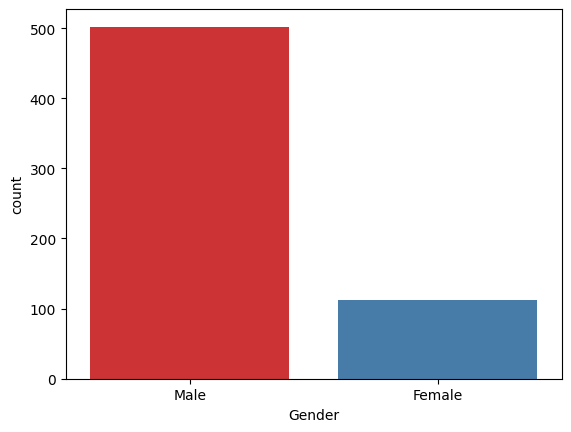

In [104]:
print("Number of people who took loan by Gender:")
print(df['Gender'].value_counts())
sns.countplot(x='Gender', data = df, palette="Set1")

Number of people who took loan by Maritual Status:
Married
Yes    401
No     213
Name: count, dtype: int64


C:\Users\q1\AppData\Local\Temp\ipykernel_7396\562545300.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Married', data = df, palette="Set1")


<Axes: xlabel='Married', ylabel='count'>

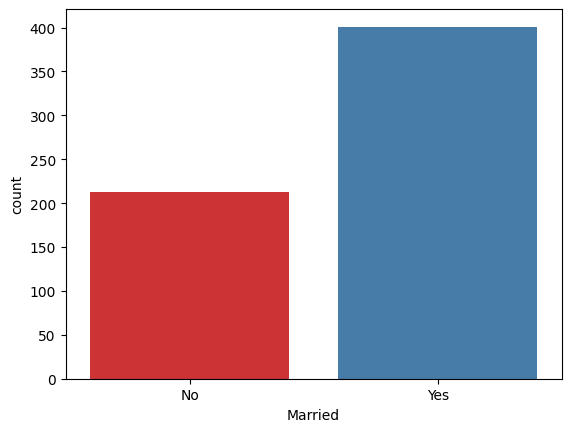

In [105]:
print("Number of people who took loan by Maritual Status:")
print(df['Married'].value_counts())
sns.countplot(x='Married', data = df, palette="Set1")

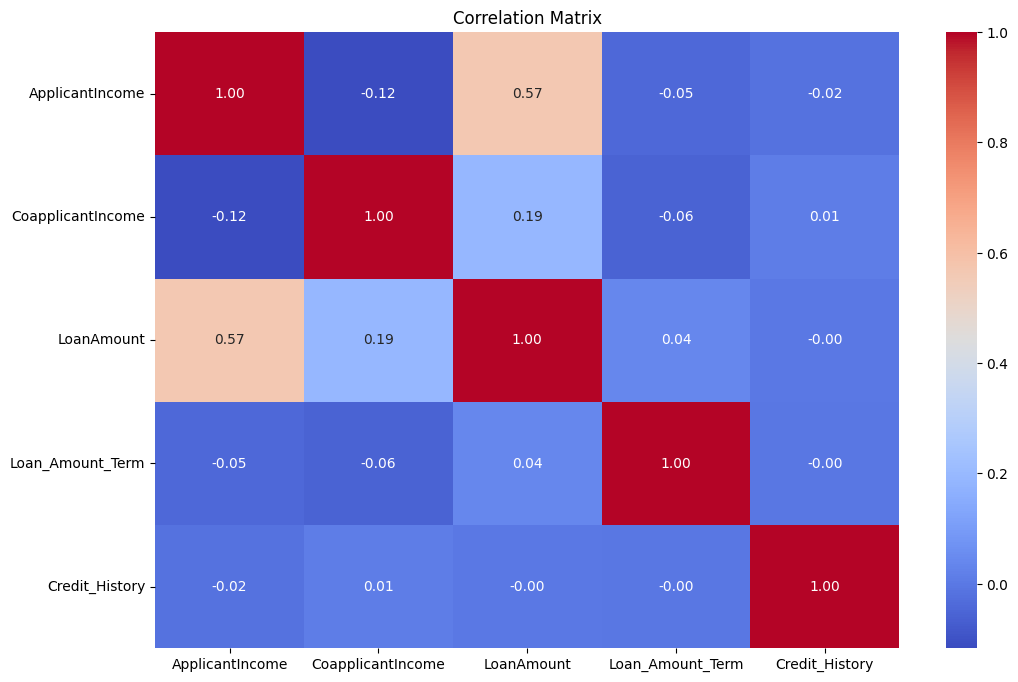

In [106]:
Numerical_Features = ['ApplicantIncome','CoapplicantIncome','LoanAmount', 'Loan_Amount_Term','Credit_History']


corr = df[Numerical_Features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### Feature Engineering 

In [107]:
# lets add applicant income and coapplicant income to one column called total income 

df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0


In [108]:
df.drop(['ApplicantIncome','CoapplicantIncome'], axis = 1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,128.0,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,141.0,360.0,1.0,Urban,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,71.0,360.0,1.0,Rural,Y,2900.0
610,LP002979,Male,Yes,3+,Graduate,No,40.0,180.0,1.0,Rural,Y,4106.0
611,LP002983,Male,Yes,1,Graduate,No,253.0,360.0,1.0,Urban,Y,8312.0
612,LP002984,Male,Yes,2,Graduate,No,187.0,360.0,1.0,Urban,Y,7583.0


C:\Users\q1\AppData\Local\Temp\ipykernel_7396\1582373303.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Total_Income'])


<Axes: xlabel='Total_Income', ylabel='Density'>

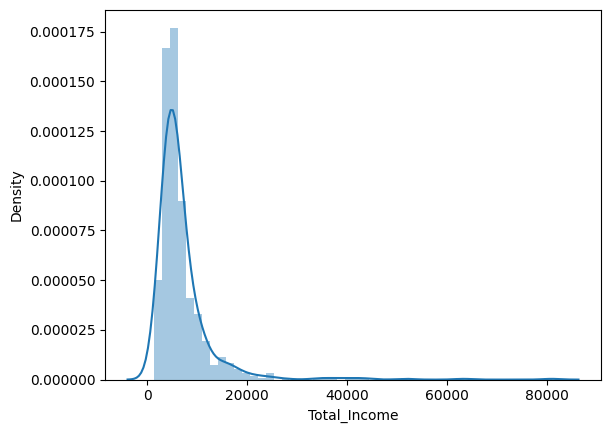

In [109]:
sns.distplot(df['Total_Income'])

### As We notice the Total Income follows a right-skewed distribution, not a normal one. By applying a log transformation, we can make the data more symmetrical and closer to a normal distribution,
### which is beneficial for many statistical models and machine-learning algorithms.

### Skewed data can lead to:

### Poor model fit

### Biased predictions

### Inflated importance of outliers



In [110]:
df['Log_Total_Income'] = np.log(df['Total_Income'] + 1)

C:\Users\q1\AppData\Local\Temp\ipykernel_7396\1260431235.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Log_Total_Income'])


<Axes: xlabel='Log_Total_Income', ylabel='Density'>

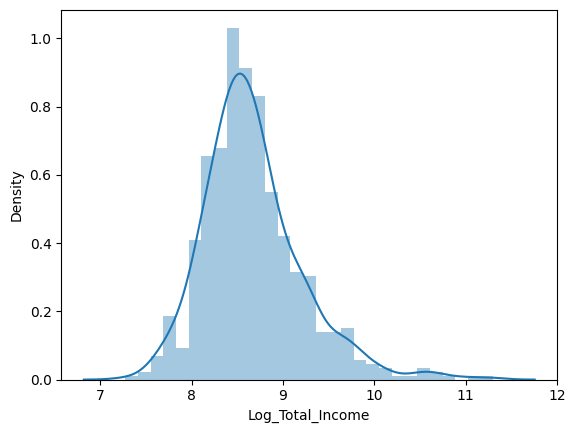

In [111]:
sns.distplot(df['Log_Total_Income'])

In [112]:
df.drop(['Total_Income'], axis = 1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Log_Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,8.674197
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,8.714732
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,8.006701
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,8.505525
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,8.699681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,7.972811
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,8.320448
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,9.025576
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,8.933796


### same for LoanAmount

C:\Users\q1\AppData\Local\Temp\ipykernel_7396\413488336.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['LoanAmount'])


<Axes: xlabel='LoanAmount', ylabel='Density'>

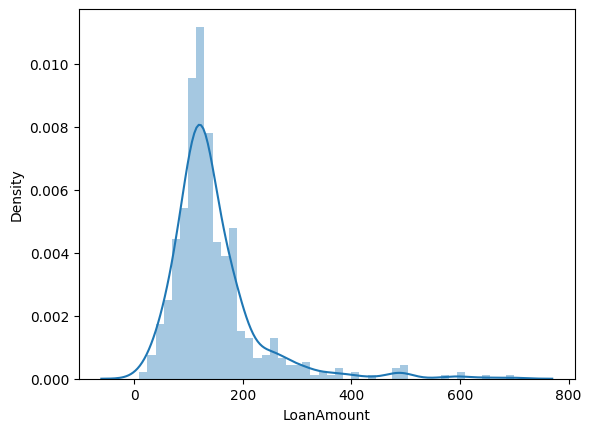

In [113]:
sns.distplot(df['LoanAmount'])

In [114]:
df['Log_Loan_Amount'] = np.log(df['LoanAmount'] + 1)

C:\Users\q1\AppData\Local\Temp\ipykernel_7396\1327961900.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Log_Loan_Amount'])


<Axes: xlabel='Log_Loan_Amount', ylabel='Density'>

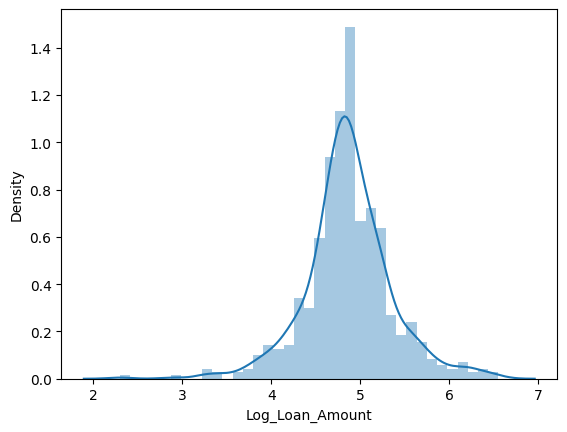

In [115]:
sns.distplot(df['Log_Loan_Amount'])

In [116]:
pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [117]:
df.head()
df.drop(['Total_Income', 'LoanAmount', 'ApplicantIncome',	'CoapplicantIncome'], axis = 1, inplace = True)


In [118]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

numerical_features = ['Loan_Amount_Term', 'Log_Total_Income', 'Log_Loan_Amount']

categorical_features = ['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

encoder = LabelEncoder()
for col in categorical_features:
    df[col] = encoder.fit_transform(df[col])


scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Log_Total_Income,Log_Loan_Amount
0,0,1,0,0,0,0,0.273231,1.0,2,Y,0.008426,-0.012803
1,1,1,1,1,0,0,0.273231,1.0,0,N,0.082860,-0.012803
2,2,1,1,0,0,1,0.273231,1.0,2,Y,-1.217299,-1.348663
3,3,1,1,0,1,0,0.273231,1.0,2,Y,-0.301306,-0.143351
4,4,1,0,0,0,0,0.273231,1.0,2,Y,0.055223,0.182981


In [155]:


y = df['Loan_Status']
X = df.drop(['Loan_Status'], axis = 1)





When you use an encoder like OneHotEncoder from scikit-learn, the transformation results in a NumPy array by default, which loses the column names and indices from the original DataFrame.

To integrate the encoded data back into your dataset seamlessly, you need to:

Retrieve Column Names: Ensure that the encoded features have meaningful column names.

Preserve Index: Retain the row indices for compatibility with the rest of the DataFrame.

In [144]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape is {X_train.shape}")
print(f"y_train shape is {y_train.shape}")
print(f"X_test shape is {X_test.shape}")
print(f"y_test shape is {y_test.shape}")



X_train shape is (491, 11)
y_train shape is (491,)
X_test shape is (123, 11)
y_test shape is (123,)


In [156]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

LogRegModel = LogisticRegression()

LogRegModel.fit(X_train, y_train)
prediction = LogRegModel.predict(X_test) 

class_report = classification_report(y_test, prediction)
accuracy = accuracy_score(y_test, prediction)

print(f"The accuracy of Logistic Regression model is {accuracy}")
print(class_report)

The accuracy of Logistic Regression model is 0.7886178861788617
              precision    recall  f1-score   support

           N       0.95      0.42      0.58        43
           Y       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



C:\Users\q1\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [157]:
# Decision Tree Classifier 

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(X_train, y_train)
prediction = model.predict(X_test) 

class_report = classification_report(y_test, prediction)
accuracy = accuracy_score(y_test, prediction)

print(f"The accuracy of Decision Tree model is {accuracy}")
print(class_report)

The accuracy of Decision Tree model is 0.6585365853658537
              precision    recall  f1-score   support

           N       0.51      0.51      0.51        43
           Y       0.74      0.74      0.74        80

    accuracy                           0.66       123
   macro avg       0.62      0.62      0.62       123
weighted avg       0.66      0.66      0.66       123



In [158]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
prediction = model.predict(X_test)

class_report = classification_report(y_test, prediction)
accuracy = accuracy_score(y_test, prediction)

print(f"The accuracy of Random Forest  model is {accuracy}")
print(class_report)

The accuracy of Random Forest  model is 0.7886178861788617
              precision    recall  f1-score   support

           N       0.90      0.44      0.59        43
           Y       0.76      0.97      0.86        80

    accuracy                           0.79       123
   macro avg       0.83      0.71      0.73       123
weighted avg       0.81      0.79      0.77       123



In [159]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
prediction = model.predict(X_test)

class_report = classification_report(y_test, prediction)
accuracy = accuracy_score(y_test, prediction)

print(f"The accuracy of Knn  model is {accuracy}")
print(class_report)

The accuracy of Knn  model is 0.5528455284552846
              precision    recall  f1-score   support

           N       0.30      0.21      0.25        43
           Y       0.63      0.74      0.68        80

    accuracy                           0.55       123
   macro avg       0.47      0.47      0.46       123
weighted avg       0.52      0.55      0.53       123



# What we notice is the bad metrics especially for the negative target(N), lets disccuss the distrubtion of the data with respect to the target(Loan_Status)

In [160]:
df['Loan_Status'].value_counts() 

Loan_Status
Y    422
N    192
Name: count, dtype: int64

# as we notice we have imbalanced target, lets try to rebalance targets by Oversampling minority or Undersampling majority

# Random Oversampling tries to duplicate the minority class which could lead to overfitting. its better to use more advanced techniques like SMOTE or ADASYN

In [161]:
from imblearn.over_sampling import SMOTE

In [162]:
oversample = SMOTE(random_state=42)
X_resampled, y_resampled = oversample.fit_resample(X, y)
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns = X.columns), pd.Series(y_resampled, name = "Loan_Status")], axis = 1)

In [163]:
y_resampled.value_counts()

Loan_Status
Y    422
N    422
Name: count, dtype: int64

In [164]:
X_resampled_train, X_resampled_test, y_resampled_train, y_resampled_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)

In [165]:
LogRegModel = LogisticRegression()

LogRegModel.fit(X_resampled_train, y_resampled_train)
prediction = LogRegModel.predict(X_resampled_test) 

class_report = classification_report(y_resampled_test, prediction)
accuracy = accuracy_score(y_resampled_test, prediction)

print(f"The accuracy of Logistic Regression model is {accuracy}")
print(class_report)

The accuracy of Logistic Regression model is 0.7203791469194313
              precision    recall  f1-score   support

           N       0.86      0.58      0.69       114
           Y       0.64      0.89      0.74        97

    accuracy                           0.72       211
   macro avg       0.75      0.73      0.72       211
weighted avg       0.76      0.72      0.72       211



C:\Users\q1\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [167]:
# Decision Tree Classifier 

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(X_resampled_train, y_resampled_train)
prediction = model.predict(X_resampled_test) 

class_report = classification_report(y_resampled_test, prediction)
accuracy = accuracy_score(y_resampled_test, prediction)

print(f"The accuracy of Decision Tree model is {accuracy}")
print(class_report)

The accuracy of Decision Tree model is 0.7677725118483413
              precision    recall  f1-score   support

           N       0.78      0.80      0.79       114
           Y       0.76      0.73      0.74        97

    accuracy                           0.77       211
   macro avg       0.77      0.77      0.77       211
weighted avg       0.77      0.77      0.77       211

